## Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy

from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors  

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\athet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### K-Means Clustering

Below we create some random data

[[ 2.58324215 -4.05626683]
 [ 0.8638039  -2.35972919]
 [ 1.20656441 -4.84174737]
 [ 3.50288142 -5.24528809]
 [ 1.94204778 -4.90900761]
 [ 3.55145404 -1.70779199]
 [ 3.04153939 -5.11792545]
 [ 3.53905832 -4.5961597 ]
 [ 2.9808695  -2.82499878]
 [ 2.25212905 -3.99097475]
 [ 2.12189211 -4.15643417]
 [ 3.25657045 -4.98877905]
 [ 2.66117803 -4.23618403]
 [ 2.36234499 -5.18761229]
 [ 1.57878277 -4.1534952 ]
 [ 2.73094304 -1.76863321]
 [ 0.56523242 -3.8872735 ]
 [ 3.37044454 -2.64036614]
 [ 3.50185721 -4.8442137 ]
 [ 3.00000976 -3.45764743]
 [ 2.6864918  -3.22898826]
 [ 1.13190935 -2.26881533]
 [ 4.46767801 -4.33567734]
 [ 3.61134078 -3.95202941]
 [ 2.17086471 -3.91228978]
 [ 1.00036589 -0.38109252]
 [-0.37566942 -0.07447076]
 [ 0.43349633  1.27837923]
 [-0.63467931  0.50839624]
 [ 0.21611601 -1.85861239]
 [-0.41931648 -0.1323289 ]
 [-0.03957024  0.32600343]
 [-2.04032305  0.04625552]
 [-0.67767558 -1.43943903]
 [ 0.52429643  0.73527958]
 [-0.65325027  0.84245628]
 [-0.38151648  0.06648901]
 

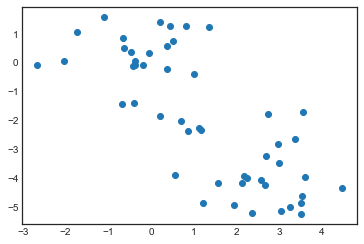

In [2]:
# Generate random data
np.random.seed(2)                            # seed the random number generator (reproducible)
X = np.random.standard_normal(size=(50,2))   # draw samples from a standard normal distribution
                                             # size = (50, 2) means 50*2 samples are drawn

X[:25,0] = X[:25,0]+3                        # +3 for the first 25 data in the first column of the array 
X[:25,1] = X[:25,1]-4                        # -4 for the first 25 data in the second column of the array
plt.scatter(X[:,0], X[:,1])                  # first column as X, second column as Y of the plot

print(X)

### K=2

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# n_clusters: the no of clusters to form as well as the no. of centroids to generate
## n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
## The final results will be the best output of n_init consecutive runs in terms of inertia.

km1 = KMeans(n_clusters=2, n_init=20)                # create the k-means model
km1.fit(X)                                           # fit the model with data
km1.labels_                                          # print the labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [4]:
# Sum of squared distances of samples to their closest cluster center

km1.inertia_

99.30578397914687

In [5]:
km_1 = KMeans(n_clusters=2, n_init=1)               
km_1.fit(X)                                           
km_1.inertia_
km_2 = KMeans(n_clusters=2, n_init=5)               
km_2.fit(X)                                           
km_2.inertia_ 
km_3 = KMeans(n_clusters=2, n_init=10)               
km_3.fit(X)                                           
km_3.inertia_ 
km_4 = KMeans(n_clusters=2, n_init=20)               
km_4.fit(X)                                           
km_4.inertia_ 

print(km_1.inertia_, km_2.inertia_, km_3.inertia_, km_4.inertia_)
print(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1])
print(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1])
print(km_4.cluster_centers_[:,0], km_4.cluster_centers_[:,1])

99.71828731285503 99.30578397914687 99.30578397914687 99.30578397914687
[ 2.46480671 -0.28003288] [-3.74242216  0.2418374 ]
[-0.23940153  2.53287159] [ 0.14703307 -3.80815122]
[-0.23940153  2.53287159] [ 0.14703307 -3.80815122]


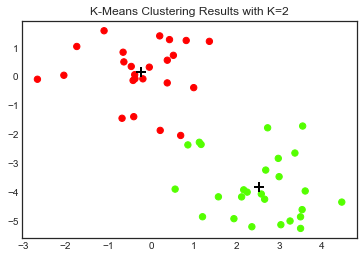

In [6]:
# create a figure and one subplot

f, ax = plt.subplots()

# create the subplots using the 50 objects
# s=size of markers, c=number of colours/clusters to be mapped to colours using cmaps
# cmaps is the colormap (https://matplotlib.org/stable/tutorials/colors/colormaps.html)

ax.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism)

# set the title of the subplot
# add centroid using cluster_centers_: Coordinates of cluster centers

ax.set_title('K-Means Clustering Results with K=2')
ax.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

### K=3

In [7]:
# seed the random number generator (reproducible)
# change k to 3
# fit the model with data (X)
    
np.random.seed(4)                                
km2 = KMeans(n_clusters=3, n_init=20)            
km2.fit(X)                                   

# km.labels_: Print the cluster label of the 50 objects
# Series.value_counts: Return a Series containing counts of unique values (i.e. show how many objects in each cluster)

print(km2.labels_)
pd.Series(km2.labels_).value_counts()           

[2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 2 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 0]


2    21
1    20
0     9
dtype: int64

In [8]:
# get the centroids of three clusters

km2.cluster_centers_

array([[ 0.69945422, -2.14934345],
       [-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797]])

In [9]:
# print the cluster labels of the 50 objects

km2.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0])

In [10]:
## n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
## The final results will be the best output of n_init consecutive runs in terms of inertia.
## inertia_: Return the "minimum" sum of squared distances of samples to their closest cluster center

km2.inertia_

68.97379200939724

### K=3 
Visualise the 3 clusters

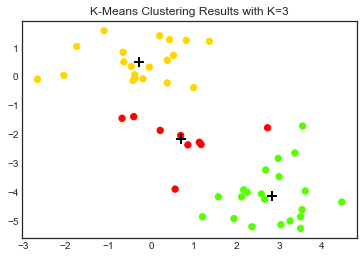

In [11]:
f, ax2 = plt.subplots()
ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

#### What is the limitation of K-Means?

#### Ans:

For simple k-means, the limitation is that the user has to define the number of clusters (k) in the beginning and k-means can only handle numerical data. K-means also assumes that we deal with spherical clusters and each cluster has the same amount of observations.

### Hierarchical Clustering

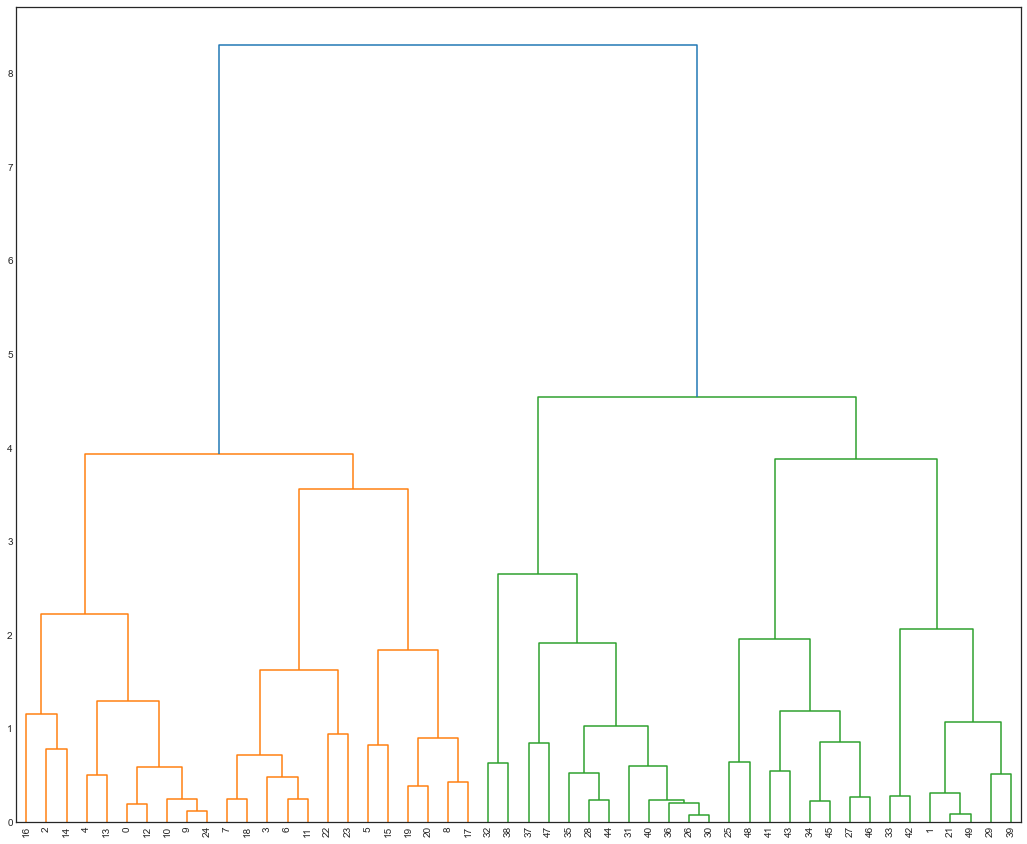

In [12]:
# perform hierarchical clustering using "complete" linkage method using the input "X"

linkage1=hierarchy.complete(X) 

# prepare a figure with a subplot

f, ax =plt.subplots(1,1,figsize=(18,15))

# plot the hierarchical clustering as a dendrogram
# scipy.cluster.hierarchy.dendrogram(Z, orientation, )
## Z: The linkage matrix encoding the hierarchical clustering to render as a dendrogram
## orientation: 'top', 'bottom', 'left', 'right'
# Reference (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

cluster=hierarchy.dendrogram(linkage1,orientation='top', leaf_font_size=10, ax=ax)

### Try
Plot the other type of linkage using on the random data X (used in the k-means)
- hierarchy.average(X) 
- hierarchy.single(X)
    

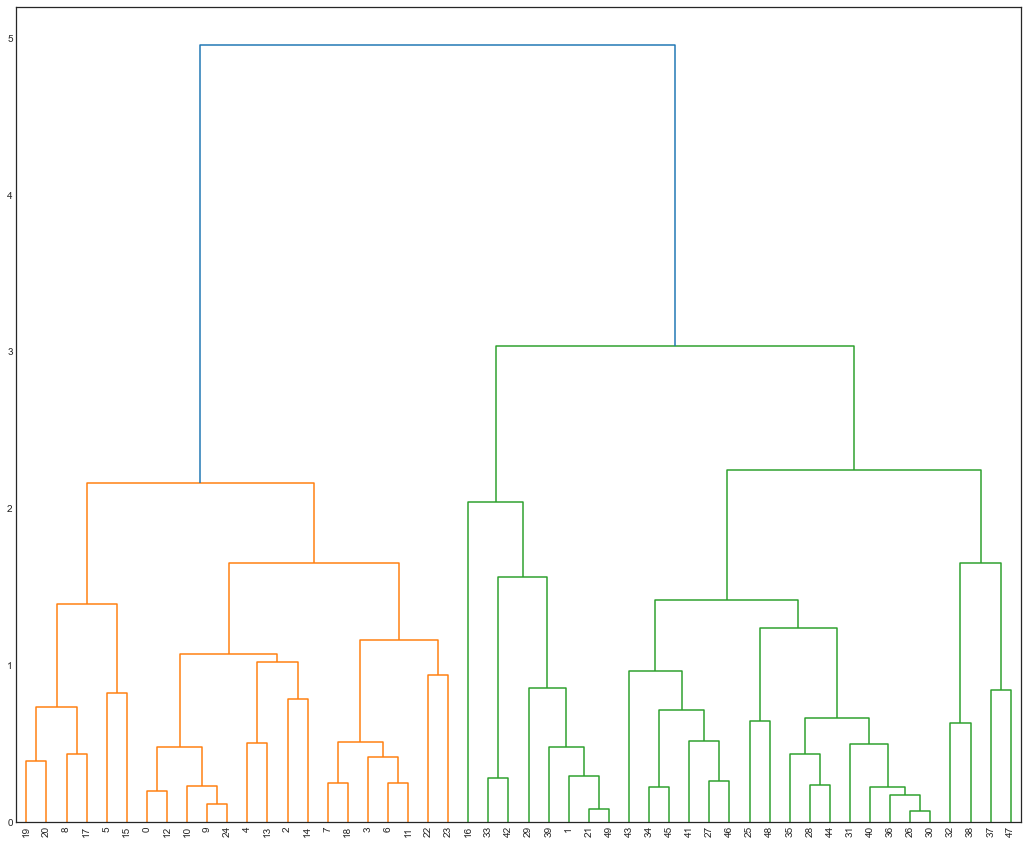

In [13]:
#create hierarchical cluster using complete linkage

linkage2=hierarchy.average(X)

# prepare plot

f1,ax1=plt.subplots(1,1,figsize=(18,15)) 

# plot the hierarchical clustering as a dendrogram

cluster=hierarchy.dendrogram(linkage2,orientation='top',leaf_font_size=10,ax=ax1)

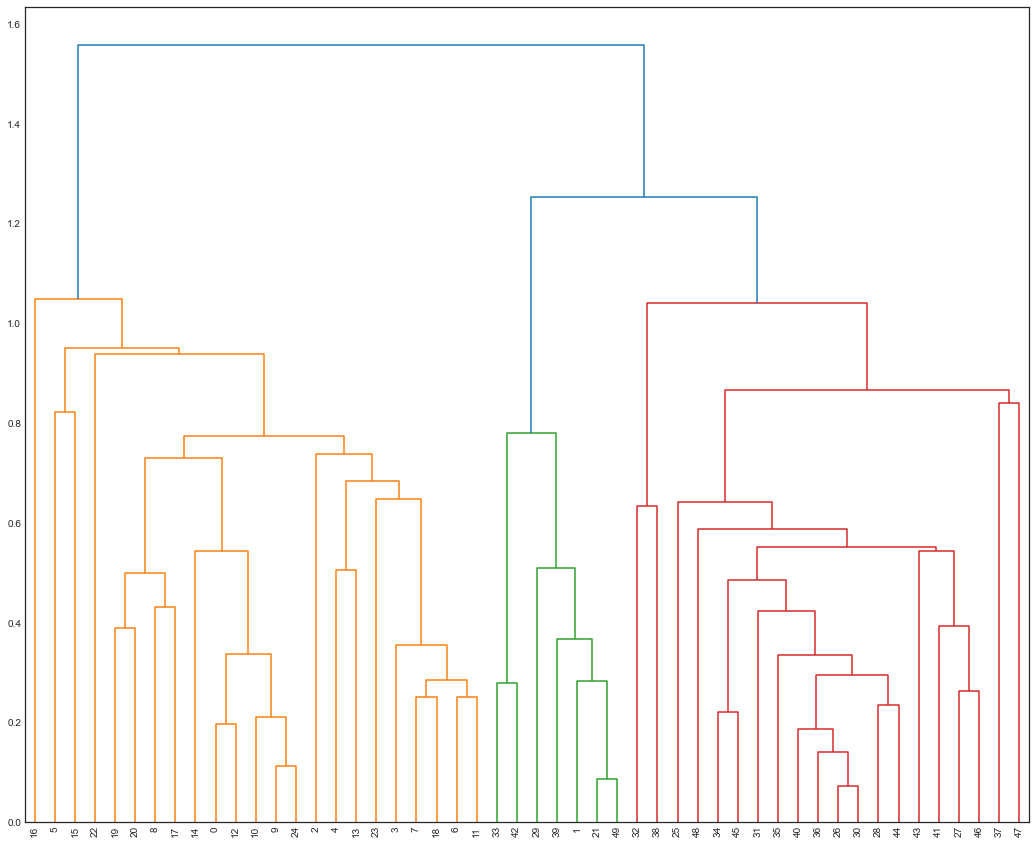

In [15]:
#create hierarchical cluster using complete linkage

linkage3=hierarchy.single(X) 

# prepare plot

f2,ax2=plt.subplots(1,1,figsize=(18,15))

# plot the hierarchical clustering as a dendrogram

cluster=hierarchy.dendrogram(linkage3,orientation='top',leaf_font_size=10,ax=ax2)

#### How is k-Means different to hierarchical clustering?

#### Ans:

Hierarchical clustering is a set of nested clusters that are arranged
as a tree while k-Means clustering is found to work well when the structure of the clusters is hyper spherical. Hierarchical clustering does not work well as k-Means when the shape of the clusters are hyper spherical.

In [14]:
from scipy.cluster.hierarchy import cut_tree
# cut_tree(linkage1, n_clusters=2)
cut_tree(linkage1, height=3)

array([[0],
       [1],
       [0],
       [2],
       [0],
       [3],
       [2],
       [2],
       [3],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [3],
       [0],
       [3],
       [2],
       [3],
       [3],
       [1],
       [2],
       [2],
       [0],
       [4],
       [5],
       [4],
       [5],
       [1],
       [5],
       [5],
       [5],
       [1],
       [4],
       [5],
       [5],
       [5],
       [5],
       [1],
       [5],
       [4],
       [1],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [1]])

### Density Clustering DBSCAN


In [15]:
# DBSCAN: Perform DBSCAN clustering from vector array or distance matrix.
## eps (epsilon): The maximum distance between two samples for one to be considered as in the neighborhood of the other; default=0.5
## min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself; default=5.
# Fit the DBSCAN model with the data (X)
db = DBSCAN(eps=1.5, min_samples=10).fit(X)

# cluster labels of the 50 samples. -1 is noise
labels = db.labels_
print('Cluster label of samples:', labels)

# create array of zeros that is same size as db.labels_ using numpy.zeros_like and set the dataype to boolean. 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
print('An array of FALSE:', core_samples_mask)

# indices of samples which are 'core points' 
core = db.core_sample_indices_
print('Indices of core points:', core)

# Return TRUE if the samples are core points
core_samples_mask[db.core_sample_indices_] = True
print('Core_samples_mask:', core_samples_mask[db.core_sample_indices_])

# Number of clusters in labels, ignoring noise if present. -1 is noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Cluster label of samples: [ 0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1 -1]
An array of FALSE: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
Indices of core points: [ 0  4  6  7  8  9 10 11 12 13 14 18 19 20 23 24 26 27 28 30 31 34 35 36
 40 44 45 46 48]
Core_samples_mask: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
Estimated number of clusters: 2


In [16]:
#From Sci-kit Learn 
#Plot samples and clusters
def plot_dbscan (X,labels, core_samples_mask):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):                           # assign a colour to each unique_label
        if k == -1:
        # White used for noise.
            col = [0,1,1,1]
    
        class_member_mask = (labels == k)                       

        xy = X[class_member_mask & core_samples_mask]                   # core_samples_mask = TRUE
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]                  # core_samples_mask = FALSE
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

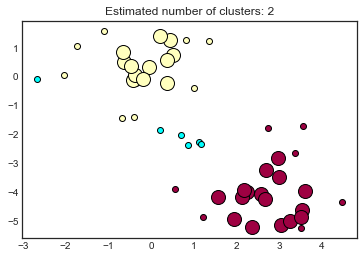

In [17]:
plot_dbscan(X, labels, core_samples_mask)

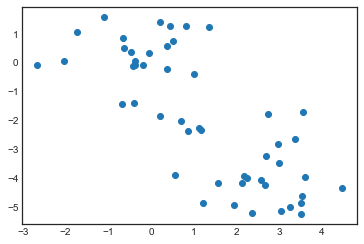

In [18]:
plt.scatter(X[:,0], X[:,1])

### Noisy Circle dataset

In [19]:
# create noisy circle dataset
# Make a large circle containing a smaller circle in 2d.
## n_samples: It is the total number of points generated.
## factor: Scale factor between inner and outer circle in the range (0, 1).
## noise: Standard deviation of Gaussian noise added to the data.
# sklearn.preprocessing.StandardScaler().fit_transform(): standardize the data

from sklearn import datasets
n_samples = 1500
X,y= datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
X = StandardScaler().fit_transform(X)

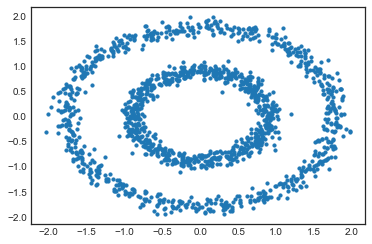

In [20]:
# Plot the noisy circle data

plt.scatter(X[:, 0], X[:, 1], s=10)

# <p style="color:red;">Task 8 (4%)</p>

### Cluster the noisy circle data (above) with using the following clustering algorithms:
    
## <p style="color:red;">1. Use K-Means (select the best K) (1 mark)</p>
Hint: you can sillhoute or elbow method to set Kmax=5

- https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
https://www.geeksforgeeks.org/ml-determine-the-optimal-value-of-k-in-k-means-clustering/

In [21]:
# Use either silhoutte or elbow method
# Show your code here

from sklearn.metrics import silhouette_score

sil = []
kmax = 5

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

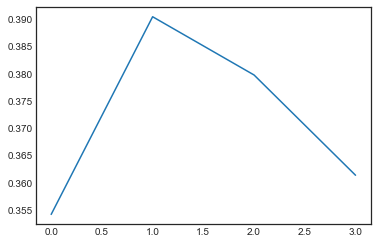

In [22]:
plt.plot(sil)

### Answer what is the best k here
#### Ans:
There is a clear peak at 1.0 hence that is the most optimal k

## <p style="color:red;">2. Use DBSCAN (select the best eps) (1 mark)</p>

Hint: you can learn how to find the best eps from the link below
    
- https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

In [23]:
# Show your code here
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

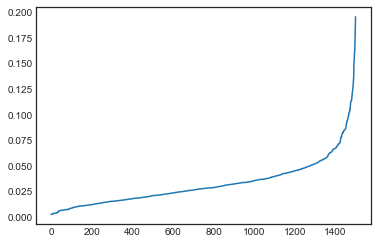

In [24]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [31]:
print(distances[1400])

0.0672157327279038


EPS: 0.06
Estimated number of clusters: 50


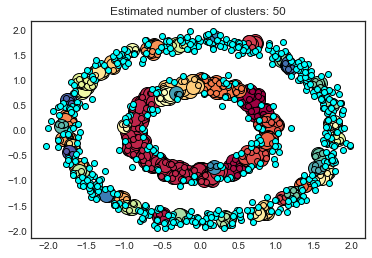

EPS: 0.08
Estimated number of clusters: 34


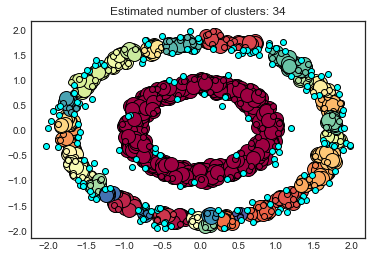

EPS: 0.1
Estimated number of clusters: 13


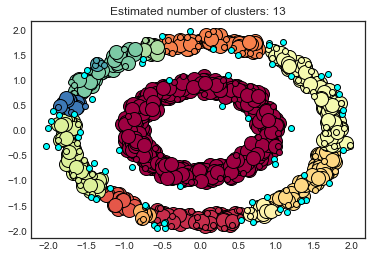

EPS: 0.12
Estimated number of clusters: 4


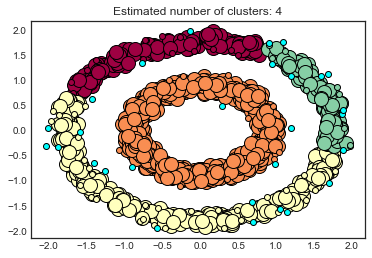

EPS: 0.14
Estimated number of clusters: 2


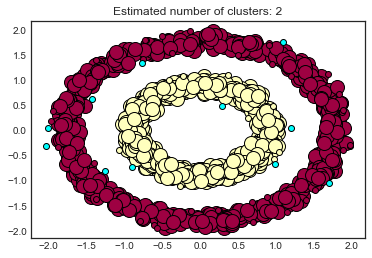

EPS: 0.16
Estimated number of clusters: 2


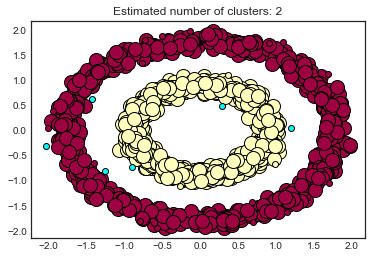

EPS: 0.18
Estimated number of clusters: 2


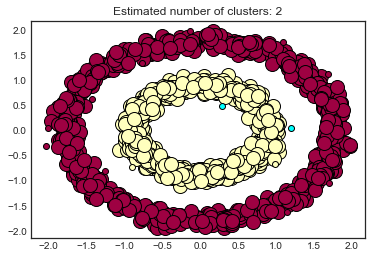

EPS: 0.2
Estimated number of clusters: 2


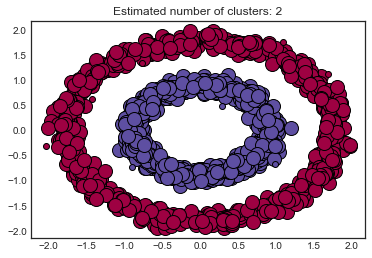

In [37]:
# Show your code here
eps = [0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20]

for i in range(len(eps)):
    m = DBSCAN(eps = eps[i], min_samples=5).fit(X)
    core_samples_mask = np.zeros_like(m.labels_, dtype=bool)
    core_samples_mask[m.core_sample_indices_] = True
    labels = m.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("EPS:", eps[i])
    print("Estimated number of clusters: %d" % n_clusters_)
    plot_dbscan(X, labels, core_samples_mask)

### Answer what is the best eps here
#### Ans:
The best eps here is 0.14

## <p style="color:red;">3. Comment on the capabilities of each clustering algorithm (2 marks)</p>

# Explain the capabilities of k-means and hierarchical clustering here
## What are the strengths and weaknesses DBSCAN?
## What are the strengths and weaknesses K-Means?

#### Capabilities of k-Means:
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data. The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.

#### Capabilities of hierarchical clustering:
Hierarchical clustering is an alternative approach to k-means clustering for identifying groups in a data set. Furthermore, hierarchical clustering has an added advantage over k-means clustering in that its results can be easily visualized using an attractive tree-based representation called a dendrogram.

#### Strengths and Weaknesses of DBSCAN:
The strengths of DBSCAN is that it is resistant to noise and cal handle clusters of various shapes and sizes. They are a lot of clusters that DBSCAN can find that k-Means would not be able to find. The weakness of DBSCAN is that it does not work to well when we are dealing with clusters of varying densities or with high dimensional data.

#### Strength and Weaknesses of K-Means:
The strength of k-Means is that it is relatively simple to implement, scales to large data sets, guarantees convergence, and generalizes to clusters of different shapes and sizes, such as elliptical clusters. The weakness of k-Means is that k has to be chosen manually. It is also dependent on initial values and k-means has trouble clustering data where clusters are of varying sizes and density.